### Importing necessary packages

In [4]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import os
import pandas as pd
import matplotlib.cm as cm
import scipy.stats as stats

mpl.rcParams['text.usetex'] = True
mpl.rcParams['font.family'] = 'serif'

AxesLabel, TickLabel = [10, 10]
plt.rcParams.update({
    'font.size' : TickLabel,                   # Set font size to 11pt
    'axes.labelsize': AxesLabel,               # -> axis labels
    'legend.fontsize': AxesLabel,              # -> legends
    'xtick.labelsize': TickLabel,              # -> x-axis tick labels
    'ytick.labelsize': TickLabel,              # -> y-axis tick labels
})

### Function to find index of the nearest value

In [5]:
def find_nearest(array, value):
    array = np.asarray(array)
    idx = (np.abs(array - value)).argmin()
    return idx

### Importing HDF5 file

In [6]:
import h5py

with h5py.File("velocity_A1_Ex1.h5","r") as f:
    print(list(f.keys()))

['velx', 'vely', 'velz', 'x', 'y', 'z']


In [7]:
with h5py.File("velocity_A1_Ex1.h5","r") as f:
    x = f["x"][()]
    y = f["y"][()]
    z = f["z"][()]
    vx = f["velx"][()]
    vy = f["vely"][()]
    vz = f["velz"][()]

### Calculating velocity components at $z=0.5$

In [8]:
ux = vx[:,:,find_nearest(z, value=0.5)]
uy = vy[:,:,find_nearest(z, value=0.5)]
uz = vz[:,:,find_nearest(z, value=0.5)]

### Plotting and saving contour plots

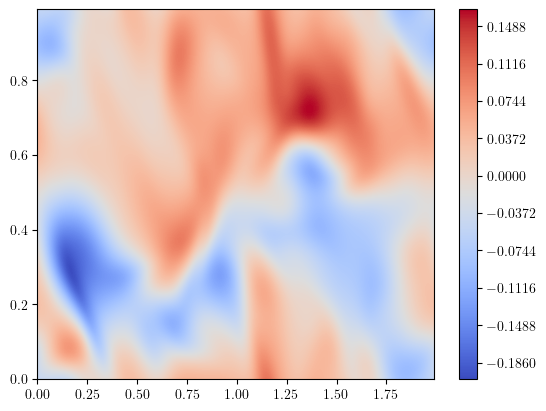

In [9]:
plt.contourf(x, y, ux.T, 1000, cmap='coolwarm')
plt.colorbar();

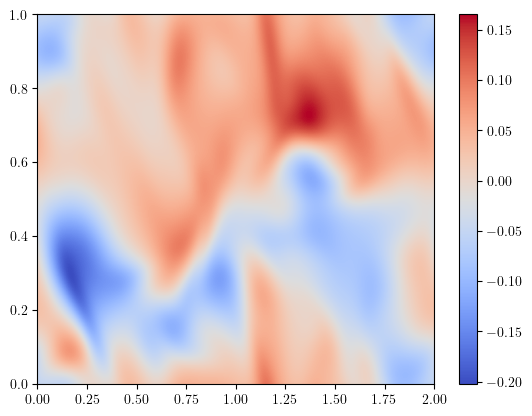

In [11]:
plt.imshow(ux.T, extent=[0, 2, 0, 1], origin='lower', cmap='coolwarm',
           interpolation='gaussian', aspect='auto')
plt.colorbar();
plt.savefig('Plots/ux_v0.pdf', bbox_inches='tight')

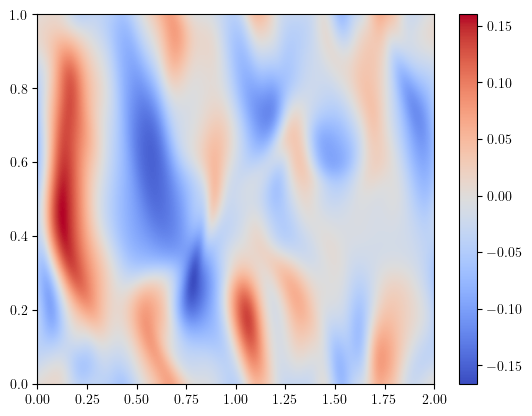

In [12]:
plt.imshow(uy.T, extent=[0, 2, 0, 1], origin='lower', cmap='coolwarm',
           interpolation='gaussian', aspect='auto')
plt.colorbar();
plt.savefig('Plots/uy_v0.pdf', bbox_inches='tight')

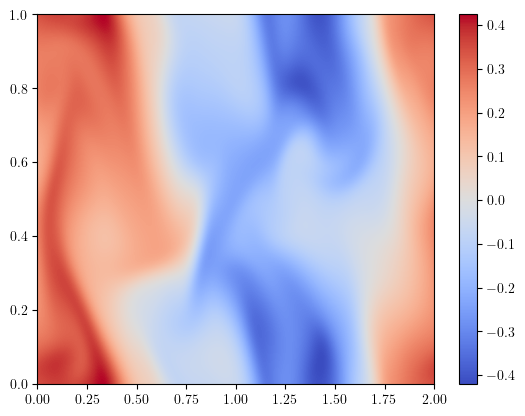

In [13]:
plt.imshow(uz.T, extent=[0, 2, 0, 1], origin='lower', cmap='coolwarm',
           interpolation='gaussian', aspect='auto')
plt.colorbar();
plt.savefig('Plots/uz_v0.pdf', bbox_inches='tight')

### Grid sizes are equal

In [14]:
diff = x[0:-2]-x[1:-1]

In [15]:
diff1 = y[0:-2]-y[1:-1]

### Computing mean velocities

In [16]:
u_mean = np.zeros(vx.shape[2])
v_mean = np.zeros(vy.shape[2])
w_mean = np.zeros(vz.shape[2])

for i in range(0,vx.shape[2]):
    u_mean[i] = np.mean(vx[:,:,i])
    v_mean[i] = np.mean(vy[:,:,i])
    w_mean[i] = np.mean(vz[:,:,i])
    

### Computing fluctuation velocities at $x=1.0$ and $y=0.5$

In [17]:
u_fluc = vx[find_nearest(x, value=1.0),find_nearest(y, value=0.5),:]-u_mean
v_fluc = vy[find_nearest(x, value=1.0),find_nearest(y, value=0.5),:]-v_mean
w_fluc = vz[find_nearest(x, value=1.0),find_nearest(y, value=0.5),:]-w_mean

### Plotting and saving fluctuation velocities

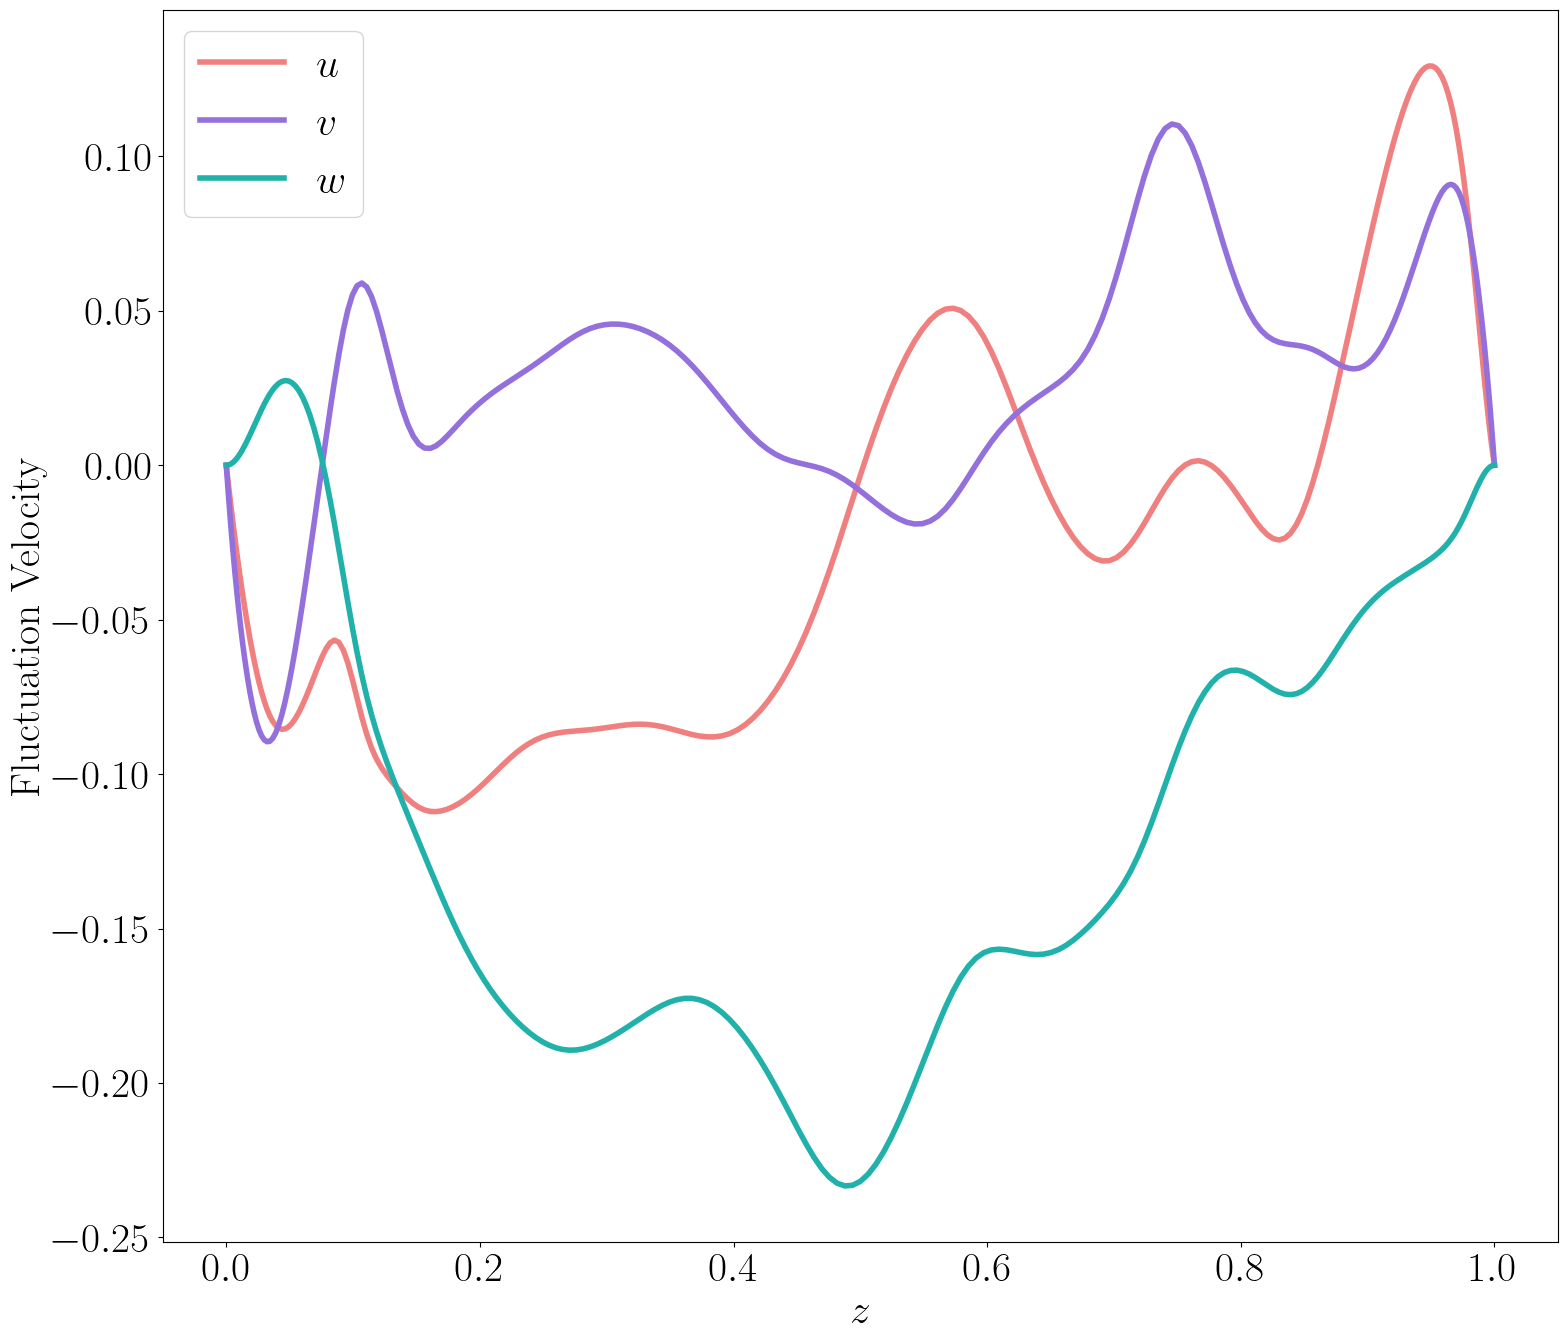

In [18]:
AxesLabel1, TickLabel1 = [30, 30]
plt.rcParams.update({
    'font.size' : TickLabel1,                   # Set font size to 11pt
    'axes.labelsize': AxesLabel1,               # -> axis labels
    'legend.fontsize': AxesLabel1,              # -> legends
    'xtick.labelsize': TickLabel1,              # -> x-axis tick labels
    'ytick.labelsize': TickLabel1,              # -> y-axis tick labels
})
fig, ax = plt.subplots(1, figsize=(18, 16))
ax.plot(z, u_fluc, 'lightcoral', label=r'$u$', linewidth=4)
ax.plot(z, v_fluc, 'mediumpurple', label=r'$v$', linewidth=4)
ax.plot(z, w_fluc, 'lightseagreen', label=r'$w$', linewidth=4)
ax.set_xlabel(r'$z$')
ax.set_ylabel('Fluctuation Velocity')
ax.legend(loc='upper left', fontsize=30)
plt.savefig('Plots/fig_1.2.pdf', bbox_inches='tight')

### Computing root mean square

In [19]:
u_ms = np.zeros(vx.shape[2])
v_ms = np.zeros(vx.shape[2])
w_ms = np.zeros(vx.shape[2])

for i in range(0,vx.shape[2]):
    for j in range(0,vx.shape[0]):
        for k in range(0,vx.shape[1]):
            u_ms[i] = u_ms[i] + vx[j,k,i]**2
            v_ms[i] = v_ms[i] + vy[j,k,i]**2
            w_ms[i] = w_ms[i] + vz[j,k,i]**2
            
u_ms = u_ms / (vx.shape[0]*vx.shape[1]-1)
v_ms = v_ms / (vx.shape[0]*vx.shape[1]-1)
w_ms = w_ms / (vx.shape[0]*vx.shape[1]-1)

u_rms = np.sqrt(u_ms)
v_rms = np.sqrt(v_ms)
w_rms = np.sqrt(w_ms)

### Computing turbulent kinetic energy

In [20]:
tke = np.zeros(vx.shape[2])

for i in range(0,vx.shape[2]):
    for j in range(0,vx.shape[0]):
        for k in range(0,vx.shape[1]):
            tke[i] = tke[i] + (vx[j,k,i] - u_mean[i])**2 + (vy[j,k,i] - v_mean[i])**2 + (vz[j,k,i] - w_mean[i])**2
            
tke_f = (1/2)*tke/(vx.shape[0]*vx.shape[1]-1)

### Plotting and saving RMS velocity and TKE

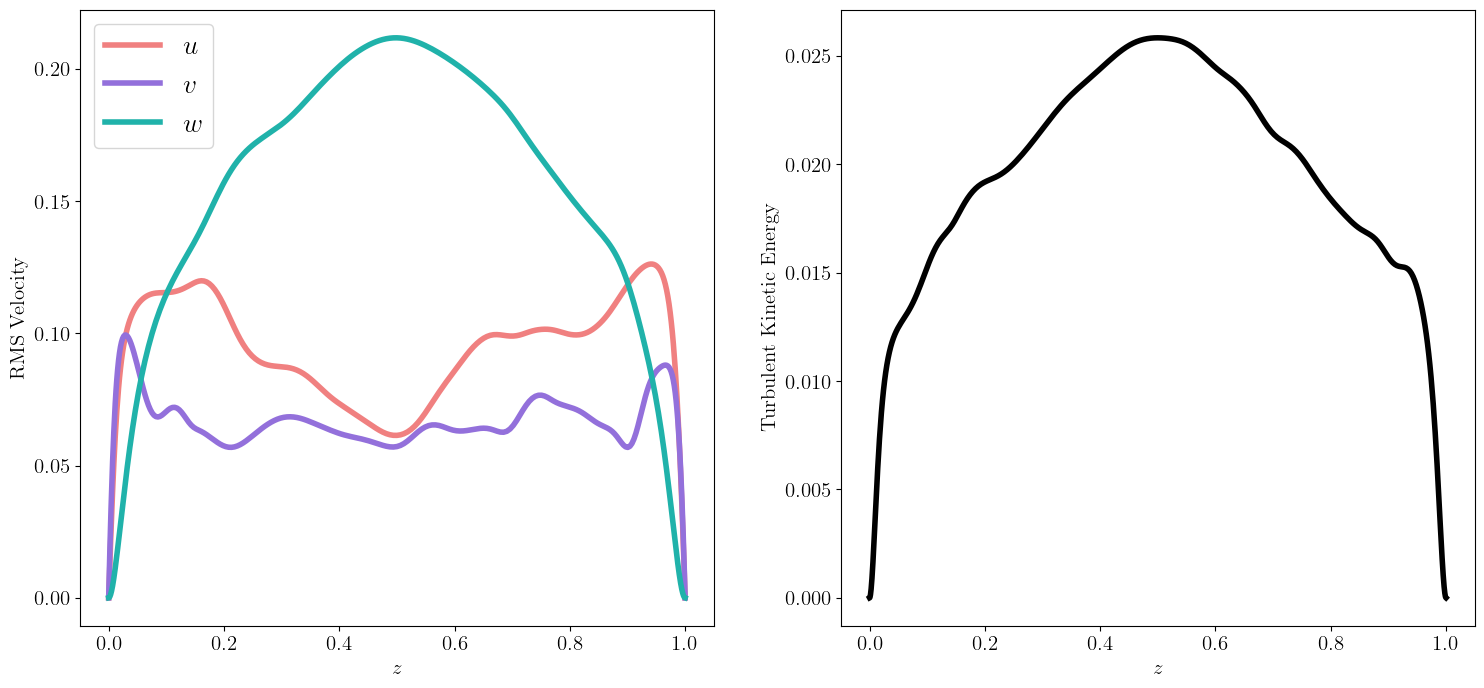

In [21]:
AxesLabel1, TickLabel1 = [15, 15]
plt.rcParams.update({
    'font.size' : TickLabel1,                   # Set font size to 11pt
    'axes.labelsize': AxesLabel1,               # -> axis labels
    'legend.fontsize': AxesLabel1,              # -> legends
    'xtick.labelsize': TickLabel1,              # -> x-axis tick labels
    'ytick.labelsize': TickLabel1,              # -> y-axis tick labels
})
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(18, 8))

ax1.plot(z, u_rms, 'lightcoral', label=r'$u$', linewidth=4)
ax1.plot(z, v_rms, 'mediumpurple', label=r'$v$', linewidth=4)
ax1.plot(z, w_rms, 'lightseagreen', label=r'$w$', linewidth=4)
ax1.set_xlabel(r'$z$')
ax1.set_ylabel('RMS Velocity')
ax1.legend(loc='upper left', fontsize=20)

ax2.plot(z, tke_f, 'k', linewidth=4)
ax2.set_xlabel(r'$z$')
ax2.set_ylabel('Turbulent Kinetic Energy')

plt.savefig('Plots/fig_1.3.pdf', bbox_inches='tight')

### Probability Density Functions $(z=0.5)$

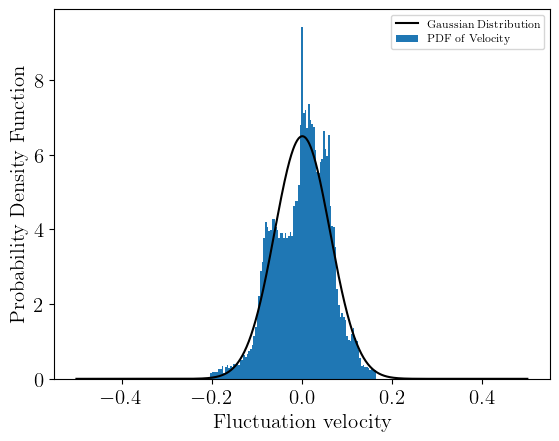

In [22]:
mean_u_prime = u_mean[find_nearest(z, value=0.5)] 

var = np.zeros(vx.shape[2])

for i in range(0,vx.shape[2]):
    for j in range(0,vx.shape[0]):
        for k in range(0,vx.shape[1]):
            var[i] = var[i] + (vx[j,k,i] - u_mean[i])**2
            
std_dev_u_prime = np.sqrt(var/(vx.shape[0]*vx.shape[1]-1))[find_nearest(z, value=0.5)]
hist, bin_edges = np.histogram(vx[:,:,find_nearest(z, value=0.5)]-u_mean[find_nearest(z, value=0.5)], bins=100, density=True)
bin_centers = (bin_edges[:-1] + bin_edges[1:]) / 2
pdf = hist / np.sum(hist)

plt.bar(bin_centers, hist, width=bin_edges[1] - bin_edges[0], label='PDF of Velocity')
x_values = np.linspace(-0.5, 0.5, 1000)  
plt.plot(x_values, stats.norm.pdf(x_values, mean_u_prime, std_dev_u_prime), 'k', label='Gaussian Distribution')
plt.legend(fontsize = 8)
plt.xlabel('Fluctuation velocity')
plt.ylabel('Probability Density Function')
plt.savefig('Plots/fig_1.4a.pdf', bbox_inches='tight')
plt.show()

### Probability Density Functions $(z=0.06)$

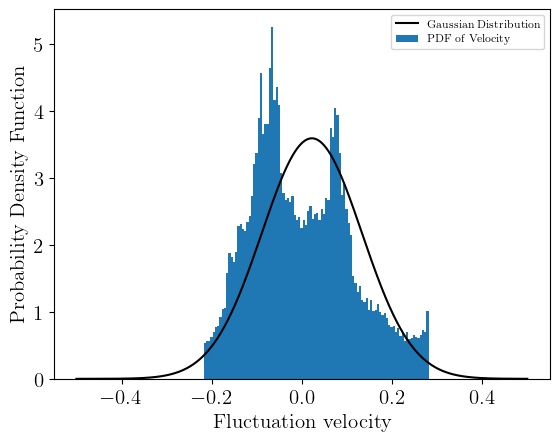

In [23]:
mean_u_prime = u_mean[find_nearest(z, value=0.06)] 

var = np.zeros(vx.shape[2])

for i in range(0,vx.shape[2]):
    for j in range(0,vx.shape[0]):
        for k in range(0,vx.shape[1]):
            var[i] = var[i] + (vx[j,k,i] - u_mean[i])**2
            
std_dev_u_prime = np.sqrt(var/(vx.shape[0]*vx.shape[1]-1))[find_nearest(z, value=0.06)]
hist, bin_edges = np.histogram(vx[:,:,find_nearest(z, value=0.06)]-u_mean[find_nearest(z, value=0.06)], bins=100, density=True)
bin_centers = (bin_edges[:-1] + bin_edges[1:]) / 2
pdf = hist / np.sum(hist)

plt.bar(bin_centers, hist, width=bin_edges[1] - bin_edges[0], label='PDF of Velocity')
x_values = np.linspace(-0.5, 0.5, 1000)  
plt.plot(x_values, stats.norm.pdf(x_values, mean_u_prime, std_dev_u_prime), 'k', label='Gaussian Distribution')
plt.legend(fontsize = 8)
plt.xlabel('Fluctuation velocity')
plt.ylabel('Probability Density Function')
plt.savefig('Plots/fig_1.4b.pdf', bbox_inches='tight')
plt.show()

### Standard deviation

In [24]:
var = np.zeros(vx.shape[2])

for i in range(0,vx.shape[2]):
    for j in range(0,vx.shape[0]):
        for k in range(0,vx.shape[1]):
            var[i] = var[i] + (vx[j,k,i] - u_mean[i])**2

std_dev_0_5 = np.sqrt(var/(vx.shape[0]*vx.shape[1]-1))[find_nearest(z, value=0.5)]
std_dev_0_06 = np.sqrt(var/(vx.shape[0]*vx.shape[1]-1))[find_nearest(z, value=0.06)]

print("For 0.5, standard deviation is",round(std_dev_0_5,3),"and for 0.06 is",round(std_dev_0_06,3))

For 0.5, standard deviation is 0.061 and for 0.06 is 0.111


### Skewness

In [25]:
den = np.zeros(vx.shape[2])

for i in range(0,vx.shape[2]):
    for j in range(0,vx.shape[0]):
        for k in range(0,vx.shape[1]):
            den[i] = den[i] + (vx[j,k,i] - u_mean[i])**3

skewness_0_5 = (den/(vx.shape[0]*vx.shape[1]-1))[find_nearest(z, value=0.5)]/(std_dev_0_5)**3
skewness_0_06 = (den/(vx.shape[0]*vx.shape[1]-1))[find_nearest(z, value=0.06)]/(std_dev_0_06)**3

print("For 0.5, skewness is",round(skewness_0_5,3),"and for 0.06 is",round(skewness_0_06,3))

For 0.5, skewness is -0.293 and for 0.06 is 0.413


### Kurtosis

In [26]:
den = np.zeros(vx.shape[2])

for i in range(0,vx.shape[2]):
    for j in range(0,vx.shape[0]):
        for k in range(0,vx.shape[1]):
            den[i] = den[i] + (vx[j,k,i] - u_mean[i])**4

kurtosis_0_5 = (den/(vx.shape[0]*vx.shape[1]-1))[find_nearest(z, value=0.5)]/(std_dev_0_5)**4
kurtosis_0_06 = (den/(vx.shape[0]*vx.shape[1]-1))[find_nearest(z, value=0.06)]/(std_dev_0_06)**4

print("For 0.5, kurtosis is",round(kurtosis_0_5,3),"and for 0.06 is",round(kurtosis_0_06,3))

For 0.5, kurtosis is 2.949 and for 0.06 is 2.51
